<a href="https://colab.research.google.com/github/txie1/logo-generation/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [ ]:
# Mounting Google Drive to access files stored there.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Changing directory to the specific site-packages folder in Google Drive.
# Need to adjust based on different environment
%cd drive/Shareddrives/pic16b/colab_env/lib/python3.10/site-packages

/content/drive/Shareddrives/pic16b/colab_env/lib/python3.10/site-packages


In [ ]:
from IPython.display import display, clear_output
from dataset import CustomDataset
from datasets import load_dataset, Dataset
from diffusers.optimization import get_scheduler
from google.colab import files
from model import UNet
from run_model_ui import get_closest_words, modelui, get_processed_words, generate_image
from schedul import ddim
from torch.utils.data import DataLoader, Dataset
from torchinfo import summary
from torchvision.transforms import (
    CenterCrop,
    Compose,
    InterpolationMode,
    RandomHorizontalFlip,
    Resize,
    ToTensor,
)
from torchvision.utils import save_image, make_grid
from tqdm.auto import tqdm
from utils import normalize_to_neg_one_to_one, plot_losses
from helper import set_seed, transforms, save_images
import gensim.downloader
import ipywidgets as widgets
import torch

## Initialize Model

In [ ]:
# Creating an instance of the UNet model with specific configurations
# Initializing a noise scheduler for the diffusion process in model training

n_timesteps = 1000
n_inference_timesteps = 50
resolution = 32

model = UNet(3, image_size=resolution, hidden_dims=[128, 256, 512, 1024], n_cfeat=5, use_linear_attn=False)
noise_scheduler = ddim.DDIMScheduler(num_train_timesteps=n_timesteps, beta_schedule="cosine")

## Load Pretrained Checkpoint

In [ ]:
device = torch.device("cuda")
model = model.to(device)

In [ ]:
# Run the trained checkpoints for result
# -------------------------------- #
checkpoint = torch.load('ckpt_1500_25.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state'])

## User Interface: User input to generate logo, with word embedding layer

### Evaluation and Results

In [ ]:
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

# Utilize model
model_input = modelui(glove_vectors)

HTML(value='<h3>Enter the words you want to create the logo with:</h3>')

Text(value='', placeholder='Enter a word here')

Button(description='Confirm', style=ButtonStyle())

Button(description='Finish', style=ButtonStyle())

Output()

100%|██████████| 50/50 [00:01<00:00, 44.91it/s]


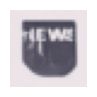

array([[[[0.9223213 , 0.8937248 , 0.9075802 ],
         [0.9240651 , 0.89446473, 0.9089655 ],
         [0.92394483, 0.8975101 , 0.9114884 ],
         ...,
         [0.9262899 , 0.8959961 , 0.9117397 ],
         [0.9246429 , 0.89174384, 0.9077075 ],
         [0.92125547, 0.89032453, 0.90994895]],

        [[0.9230561 , 0.8911942 , 0.9062618 ],
         [0.9257999 , 0.8942295 , 0.90767205],
         [0.9256054 , 0.8965864 , 0.9097017 ],
         ...,
         [0.9271764 , 0.8938552 , 0.91014826],
         [0.92566276, 0.89470327, 0.9114411 ],
         [0.925851  , 0.8904486 , 0.9054981 ]],

        [[0.92178553, 0.89269453, 0.90693164],
         [0.9252348 , 0.89460826, 0.9093871 ],
         [0.9235718 , 0.891774  , 0.9081042 ],
         ...,
         [0.9257761 , 0.8957238 , 0.9112571 ],
         [0.92422783, 0.89447296, 0.9095255 ],
         [0.9288416 , 0.8951691 , 0.9115884 ]],

        ...,

        [[0.9242002 , 0.8931813 , 0.90805304],
         [0.92833394, 0.8957744 , 0.9131986 ]

In [ ]:
# Processing words and generating an image using the model
# The function generate_image takes processed words and model parameters as input
processed_words = get_processed_words()
generate_image(processed_words,device,noise_scheduler,model,n_inference_timesteps)